<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## PART B – Logistic Regression

The ‘Diabetes Dataset.csv’ file, contains details of blood samples of diabetic patients collected in an Iraqi University Hospital in 2020 as published under the reference given below.The file provided includes 12 relevant variables as follows:
- Gender Male / Female
- Age Patient Age
- Urea A diamine, chief nitrogenous waste product in humans
- Cr Creatinine Ratio, a parameter to assess kidney function
- HbA1c Average blood glucose (sugar) Levels
- Chol Cholesterol, a parameter to assess liver function
- TG Triglycerides a type of fat in the blood used to transport energy
- HDL High-density lipoprotein, the “good” cholesterol
- LDL Low-density lipoprotein, the “bad” cholesterol
- VLDL Very-low-density lipoprotein cholesterol
- BMI Body-Mass-Index
- Diabetes N / Y / P


Ignoring the Diabetes==’P’ data entries, you are required to estimate a binary logistic regression model to
facilitate diabetes diagnostic based on blood results. Use the exploratory data analysis to make decisions about
transformations of the variables. Split the dataset in a suitable manner into training and test dataset. Evaluate the models on the test dataset using a confusion matrix. Test your final model on the Diabetes==’P’ cases. What is
the probability that these ‘prediabetic’ cases are diagnosed as diabetic?
In your report you should:
1. Use descriptive statistics and appropriate visualisations to enhance understanding of the variables in the dataset.
2. Describe the model-building steps you undertook to arrive at your final logistic regression model. The rationale for rejecting intermediate models should be explained clearly.
3. Provide a succinct summary of the parameters of your final model, verify that relevant assumptions are met and discuss model performance and fit.

- Importing dataset

In [1]:
import pandas as pd

# Load the CSV file into a pandas dataframe
df = pd.read_csv('Diabetes Dataset.csv')

# Filter out the 'P' cases
df = df[df['CLASS'] != 'P']

# View the first few rows of the filtered dataset
print(df.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
2  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  634      34224      F   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4   
4  721      34225      F   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6   

    BMI CLASS  
0  24.0     N  
1  24.0     N  
2  24.0     N  
3  21.0     N  
4  24.0     N  


Ignoring the Diabetes==’P’ data entries

In [2]:
#checking if the filtering worked
print(df['CLASS'].unique())

['N' 'Y']


In [3]:
print(df.dtypes)

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object


## 2. Exploratory Data Analysis

Firstly, I am conducting an exploratory data analysis (EDA) which is a process of investigating and summarizing the main characteristics of the Diabetes dataset to better understand its structure and features.

### 2.1 Preprocessing and Cleaning

#### 2.1.2 Missing Values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


There are no missing values

#### 2.1.3 Duplicates

In [5]:
# Check for duplicates
num_duplicates = df.duplicated().sum()

print(f'There are {num_duplicates} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


#### 2.1.4 Drop the ID and No_Pation variables

These variables are just identifiers for the patients and do not provide any valuable information for the analysis

In [6]:
df = df.drop(['ID', 'No_Pation'], axis=1)
print(df.head())

  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
0      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
1      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
2      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3      F   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0     N
4      F   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0     N


#### 2.1.5 Outliers

- Visualisation of Outliers using Boxplots


Bad key "text.kerning_factor" on line 4 in
/home/stamatis/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


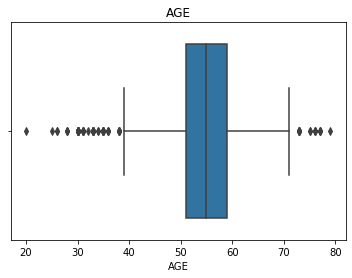

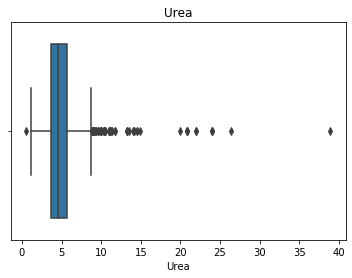

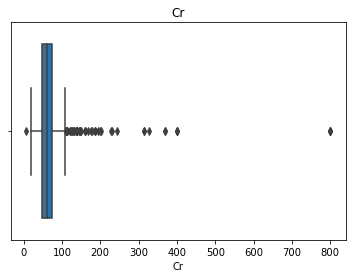

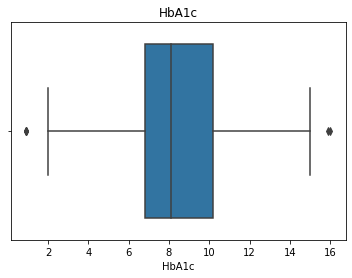

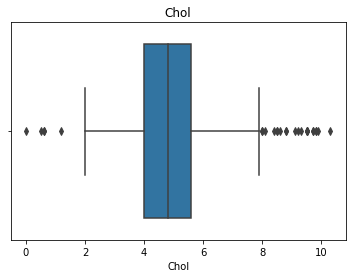

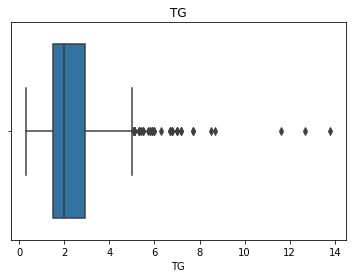

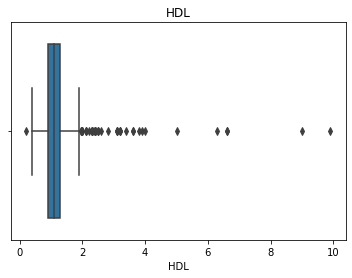

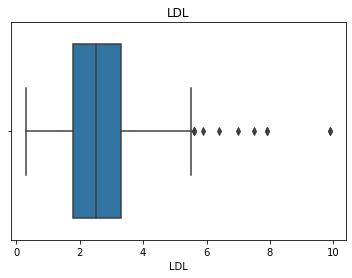

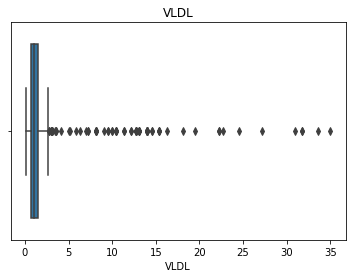

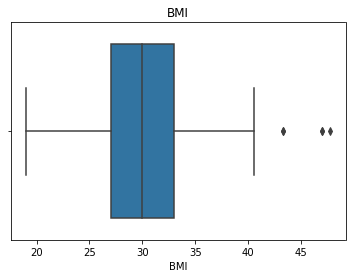

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate boxplots for all variables in the dataframe
for col in df.columns:
    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(df[col]):
        continue
        
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

- Outliers with z-score

In [8]:
from scipy.stats import zscore
import numpy as np

# Select only columns with numeric data types
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the Z-score for each variable
z_scores = numeric_cols.apply(zscore)

# Identify outliers using the Z-score
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print(outliers.sum())

AGE       7
Urea     17
Cr       12
HbA1c     0
Chol     17
TG       17
HDL      12
LDL       7
VLDL     26
BMI       3
dtype: int64


There are several options to handle the outliers such as replacing them with a reasonable value, transforming them, or removing them altogether. In my case, I have identified a small number of outliers in the variables, and I have chosen to remove them from my analysis. This approach is acceptable when having a limited number of outliers, and it is not expected to impact the overall distribution of the data significantly. By removing them, it is likely to have a more robust model that is less affected by extreme values.

In addition, it makes sense to have outliers in some of the variables such as Urea, Cr, HbA1c, Chol, TG, HDL, LDL, and VLDL, as these are medical levels, and the extreme values or errors could happen in a medical context.

In [9]:
# Drop the outliers
df = df[~outliers.any(axis=1)]

# Print the number of outliers dropped for each variable
print("Number of outliers dropped:")
print(outliers.sum())

Number of outliers dropped:
AGE       7
Urea     17
Cr       12
HbA1c     0
Chol     17
TG       17
HDL      12
LDL       7
VLDL     26
BMI       3
dtype: int64


### 2.2 EDA

After data cleaning, the next step is to perform exploratory data analysis (EDA). EDA helps to understand the relationships between the variables and the target variable. It helps to identify patterns, trends, and outliers in the data.

#### 2.1.1 Descriptive Statistics

In [10]:
df.describe(include='all')

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,848,848.000000,848.000000,848.000000,848.000000,848.000000,848.00000,848.000000,848.000000,848.000000,848.000000,848
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,754
mean,NaN,54.260613,4.866568,62.196934,8.354906,4.805778,2.22829,1.158762,2.595283,1.351769,29.608939,NaN
std,NaN,8.102895,1.946234,23.778397,2.557954,1.158064,1.15133,0.405131,1.017192,1.854500,4.675434,NaN
min,NaN,30.000000,0.500000,6.000000,0.900000,1.200000,0.30000,0.200000,0.300000,0.100000,19.000000,NaN
25%,NaN,51.000000,3.660000,47.000000,6.800000,4.000000,1.40000,0.900000,1.800000,0.700000,26.000000,NaN
50%,NaN,55.000000,4.600000,59.000000,8.100000,4.800000,2.00000,1.100000,2.500000,0.900000,30.000000,NaN
75%,NaN,60.000000,5.700000,72.000000,10.200000,5.500000,2.80000,1.300000,3.300000,1.400000,33.000000,NaN


#### 2.2.1 Transforming data variables

- Transforming the categorical value "Gender" to 0 for M(male) and 1 for F(female)
- Transforming the categorical value "CLASS" to 0 for N(no) and 1 for Y(yes)


In [11]:
# replace "M" with 0 and "F" with 1 in the "Gender" column
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})
df['CLASS'] = df['CLASS'].replace({'N': 0, 'Y': 1})
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,1,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,1,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
992,0,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
994,0,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,1
995,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
997,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1


In [12]:
print(df.dtypes)

Gender      int64
AGE         int64
Urea      float64
Cr          int64
HbA1c     float64
Chol      float64
TG        float64
HDL       float64
LDL       float64
VLDL      float64
BMI       float64
CLASS       int64
dtype: object


#### 2.2.3 Central Tendency, Dispersion

Variable: AGE
Mean: 54.260613207547166
Median: 55.0
Mode: 55
Range: 49
IQR: 9.0
Variance: 65.65691202022668
Standard deviation: 8.102895286268154



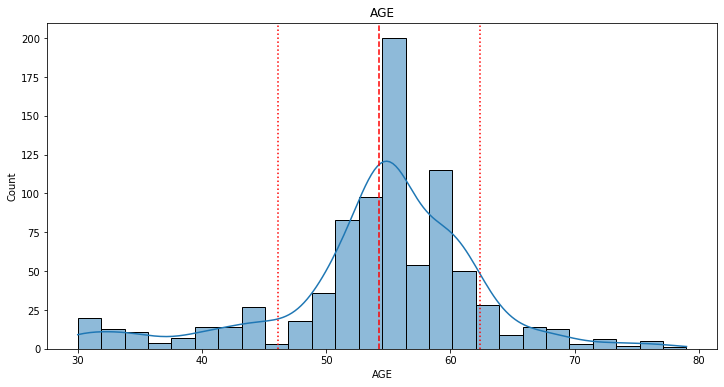

Variable: Urea
Mean: 4.866568396226411
Median: 4.6
Mode: 4.3
Range: 13.5
IQR: 2.04
Variance: 3.787827997677709
Standard deviation: 1.9462343121211558



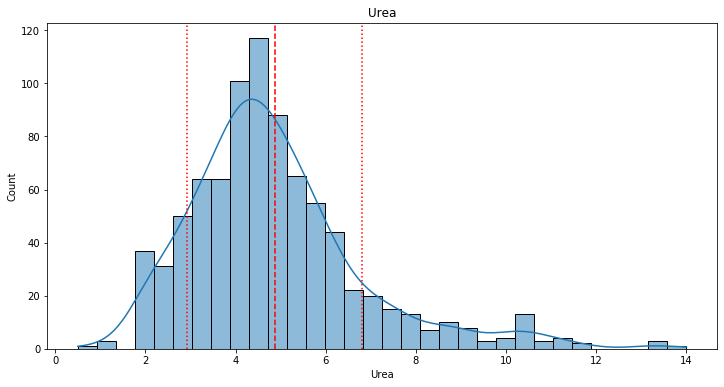

Variable: Cr
Mean: 62.196933962264154
Median: 59.0
Mode: 56
Range: 197
IQR: 25.0
Variance: 565.4121747677701
Standard deviation: 23.77839722874042



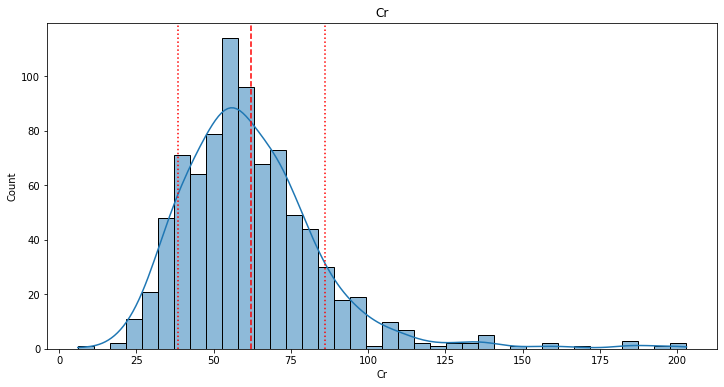

Variable: HbA1c
Mean: 8.354905660377348
Median: 8.1
Mode: 8.0
Range: 15.1
IQR: 3.3999999999999995
Variance: 6.543127736071831
Standard deviation: 2.557953818205448



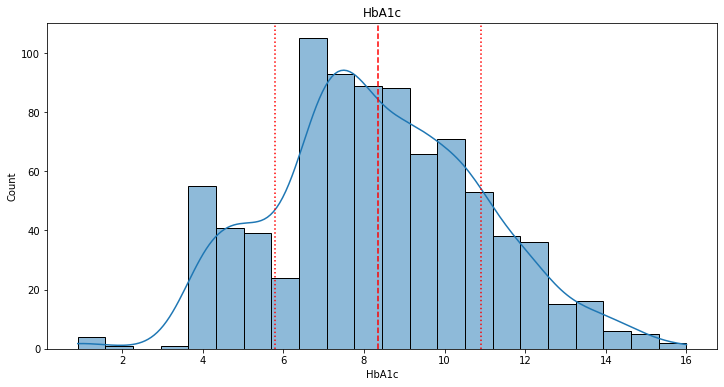

Variable: Chol
Mean: 4.805778301886792
Median: 4.8
Mode: 4.4
Range: 7.6000000000000005
IQR: 1.5
Variance: 1.3411117902252132
Standard deviation: 1.1580638109470536



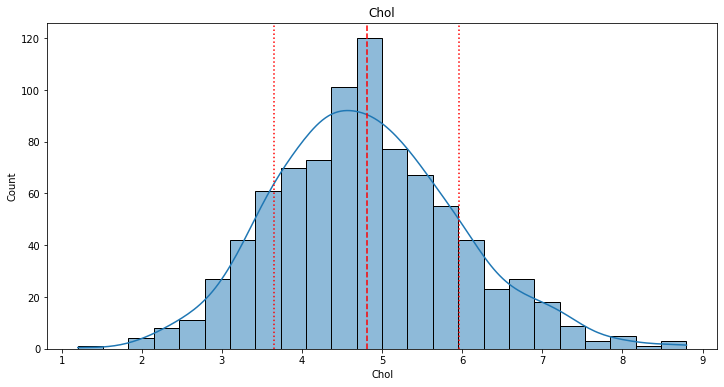

Variable: TG
Mean: 2.22829009433962
Median: 2.0
Mode: 2.1
Range: 6.0
IQR: 1.4
Variance: 1.325560591070593
Standard deviation: 1.1513299227721796



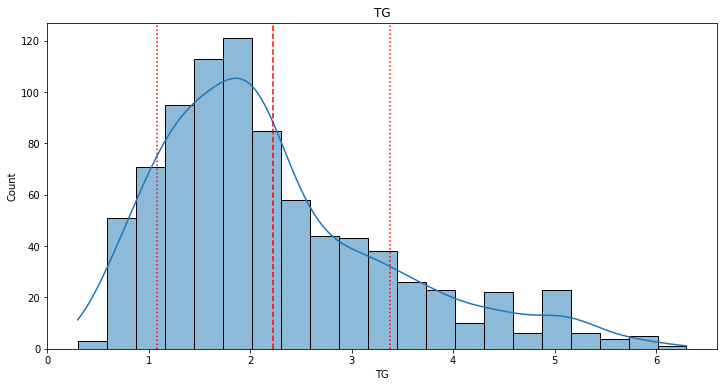

Variable: HDL
Mean: 1.15876179245283
Median: 1.1
Mode: 0.9
Range: 3.0
IQR: 0.4
Variance: 0.1641308145006792
Standard deviation: 0.4051306141242343



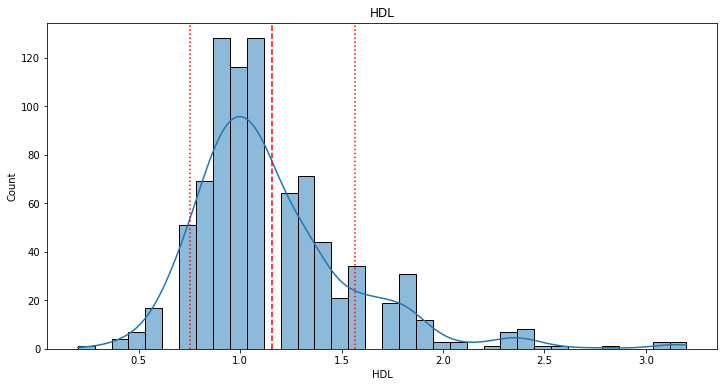

Variable: LDL
Mean: 2.595283018867921
Median: 2.5
Mode: 2.5
Range: 5.3
IQR: 1.4999999999999998
Variance: 1.0346804392862736
Standard deviation: 1.0171924298215522



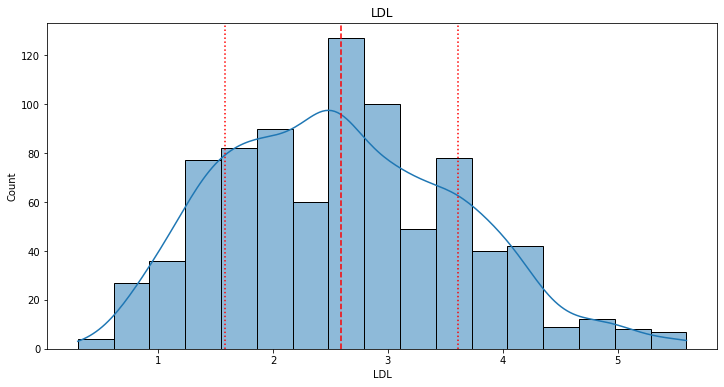

Variable: VLDL
Mean: 1.3517688679245277
Median: 0.9
Mode: 0.9
Range: 13.0
IQR: 0.7
Variance: 3.439170421131169
Standard deviation: 1.8545000461394356



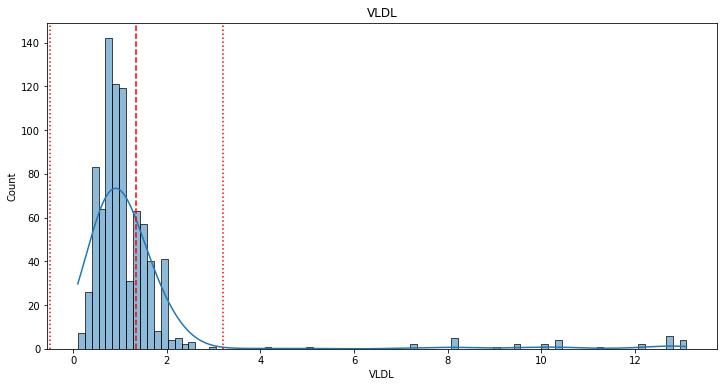

Variable: BMI
Mean: 29.608938679245277
Median: 30.0
Mode: 30.0
Range: 21.0
IQR: 7.0
Variance: 21.859686475574083
Standard deviation: 4.675434362235672



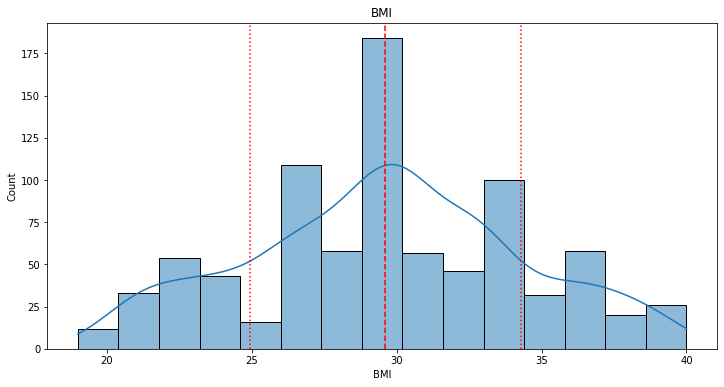

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of numeric variables
num_vars = ['AGE','Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Loop through the variables and generate summary statistics and histograms
for var in num_vars:
    # Summary statistics
    print('Variable: {}'.format(var))
    print('Mean: {}'.format(df[var].mean()))
    print('Median: {}'.format(df[var].median()))
    print('Mode: {}'.format(df[var].mode()[0]))
    print('Range: {}'.format(df[var].max() - df[var].min()))
    print('IQR: {}'.format(df[var].quantile(0.75) - df[var].quantile(0.25)))
    print('Variance: {}'.format(df[var].var()))
    print('Standard deviation: {}'.format(df[var].std()))
    print('')
    
    # Histogram
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.histplot(df[var], kde=True)
    plt.axvline(df[var].mean(), color='r', linestyle='--')
    plt.axvline(df[var].mean() + df[var].std(), color='r', linestyle=':')
    plt.axvline(df[var].mean() - df[var].std(), color='r', linestyle=':')
    plt.title(var)
    plt.show()


- AGE: The variable AGE has a mean of 54.26 and a median of 55, indicating a slightly left-skewed distribution. The range is 49, indicating a wide range of ages in the sample. The interquartile range is 9, suggesting a moderate level of variability. The variance is 65.66 and the standard deviation is 8.10, indicating a moderate level of dispersion around the mean. Overall, the data appears to be relatively normally distributed with a slight left skew.
- Urea:The variable Urea has a mean of 4.87 and a median of 4.6, indicating that the data is slightly skewed to the right. The mode is 4.3, which is the value that appears most frequently in our sample. The range is relatively small at 13.5, and the IQR is 2.04. The variance and standard deviation are relatively low, indicating that there is not a lot of variability in the data. Overall, the distribution appears to be roughly normal with some slight right skew.
- Cr:The variable Cr has a mean of 62.20 and a median of 59.0. The data has a range of 197 and an IQR of 25.0. The variance is 565.41 and the standard deviation is 23.78. Overall, the distribution appears to be somewhat right-skewed.
- HbA1c:The HbA1c variable has a mean of 8.35, median of 8.1, and mode of 8.0. It has a range of 15.1, IQR of 3.4, variance of 6.54, and a standard deviation of 2.56. The data appears to be positively skewed, as indicated by the mean being higher than the median. The range and standard deviation indicate that there is some variability in the data. Overall, the distribution appears to be moderately skewed with a moderate spread.
- Chol:The mean and median for Chol are close, suggesting a roughly symmetric distribution. The mode is slightly lower than the mean and median. The range is relatively small, indicating that there is not much variability in the data. The IQR is also small, which supports the idea of a fairly narrow distribution. The variance and standard deviation are relatively low, further indicating that the data is not highly spread out. Overall, the data for Chol appears to be normally distributed with low variability.
- TG: The TG variable has a mean of 2.23 and a median of 2.0, indicating a slightly right-skewed distribution. The mode is 2.1 and the range is 6.0, indicating some variability in the data. The IQR is 1.4 and the standard deviation is 1.15, which also suggest moderate variability in the data. Overall, the distribution appears to be moderately skewed and variable.
- LDL:The LDL variable has a mean of 2.595, a median of 2.5, and a mode of 2.5. The range is 5.3 and the standard deviation is 1.017. The distribution seems to be relatively symmetric with a slightly longer right tail.
- VLDL:The variable VLDL has a mean of 1.35, a median of 0.9, and a mode of 0.9. The range is quite large at 13.0, and the IQR is 0.7. The variance is 3.44, and the standard deviation is 1.85. The distribution appears to be skewed to the right due to the large range and a higher mean than median value.
- BMI:The BMI variable has a mean of 29.61 and a median of 30. The range is 21, indicating that the values are not too spread out. The IQR is 7, indicating that 50% of the data falls within this range. The variance is 21.86, and the standard deviation is 4.68. Overall, the distribution seems relatively normal.

#### 2.2.4 Feature engineering

In [14]:
# Define the age intervals and their corresponding numeric values
age_map = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71+': 7}

# Use the cut function to create age categories
df['AGE_categories'] = pd.cut(df['AGE'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 100], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+'])

# Use the replace function to map age categories to string values
df['AGE_numeric_str'] = df['AGE_categories'].replace(age_map).astype(str)

# Use the astype function to convert age categories to numeric values
df['AGE_numeric'] = df['AGE_numeric_str'].astype(int)

# Drop the AGE_categories and AGE_numeric_str columns
df = df.drop(columns=['AGE','AGE_categories', 'AGE_numeric_str'])

df.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,AGE_numeric
0,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
1,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
2,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
3,1,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0,4
4,1,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0,4


In [15]:
#BMI

# Define the BMI intervals and their corresponding numeric values
bmi_map = {'0-18.5': 0, '18.5-25': 1, '25-30': 2, '>30': 3}

# Use the cut function to create BMI categories
df['BMI_categories'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, df['BMI'].max()], labels=['0-18.5', '18.5-25', '25-30', '>30'])

# Use the replace function to map BMI categories to string values
df['BMI_numeric_str'] = df['BMI_categories'].replace(bmi_map).astype(str)

# Use the astype function to convert BMI categories to numeric values
df['BMI_numeric'] = df['BMI_numeric_str'].astype(int)

# Drop the BMI_categories and BMI_numeric_str columns
df = df.drop(columns=['BMI', 'BMI_categories', 'BMI_numeric_str'])

df.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,CLASS,AGE_numeric,BMI_numeric
0,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0,4,1
1,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0,4,1
2,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0,4,1
3,1,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,0,4,1
4,1,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,0,4,1


In [16]:
print(df.dtypes)

Gender           int64
Urea           float64
Cr               int64
HbA1c          float64
Chol           float64
TG             float64
HDL            float64
LDL            float64
VLDL           float64
CLASS            int64
AGE_numeric      int64
BMI_numeric      int64
dtype: object


To better analyze the relationship between age and other variables in the dataset, I transformed the continuous variable age into categorical and numerical values. Using pandas cut function, I created age categories based on the age intervals and then mapped the age categories to string values using the replace function. 
I then converted the age categories to numerical values using astype function, representing each age group with a unique number. Finally, I dropped the original age categories and string representation of numerical values, obtaining a numerical representation of the age groups.


#### 2.2.4 Correlation Analysis

- Correlation Matrix

               Gender      Urea        Cr     HbA1c      Chol        TG  \
Gender       1.000000 -0.154359 -0.276183  0.018392  0.071369 -0.000243   
Urea        -0.154359  1.000000  0.629797 -0.002610  0.033928  0.066793   
Cr          -0.276183  0.629797  1.000000 -0.112276  0.000495  0.054144   
HbA1c        0.018392 -0.002610 -0.112276  1.000000  0.134640  0.186772   
Chol         0.071369  0.033928  0.000495  0.134640  1.000000  0.334751   
TG          -0.000243  0.066793  0.054144  0.186772  0.334751  1.000000   
HDL          0.155983 -0.065635 -0.061253 -0.047421  0.072801 -0.148784   
LDL         -0.045097 -0.003094  0.086422 -0.034382  0.429884  0.058048   
VLDL        -0.162484 -0.003555  0.079661  0.041068  0.014121  0.041947   
CLASS       -0.116275  0.083536  0.016519  0.529189  0.165658  0.198018   
AGE_numeric -0.030020  0.115484  0.038521  0.388057  0.033863  0.135309   
BMI_numeric -0.080652  0.058535 -0.000406  0.431173 -0.025842  0.066728   

                  HDL   

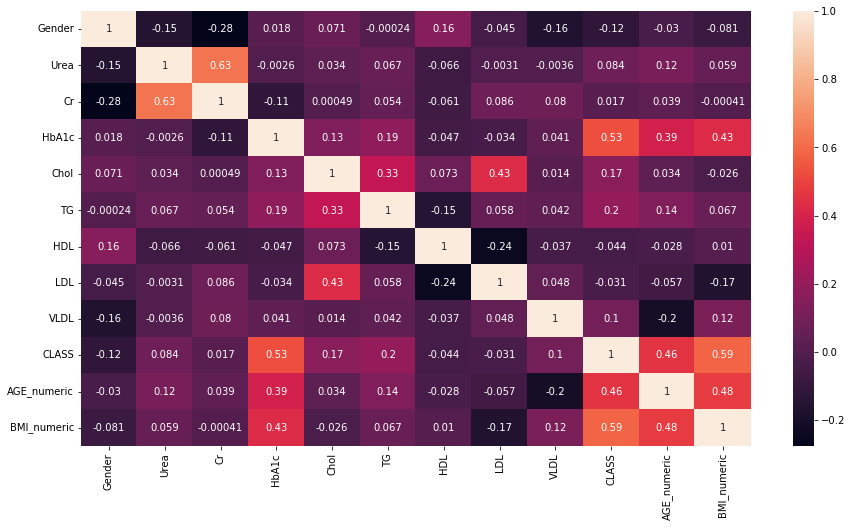

In [17]:
import pandas as pd
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Visualize correlation matrix with heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

- Urea and creatinine have a moderate positive correlation of 0.63, which is expected as both are measures of kidney function.
- HbA1c has a moderate positive correlation of 0.53 with the target variable "CLASS", indicating that it may be a significant predictor of the diabetic class
- BMI has a moderate positive correlation of 0.59 with the target variable "CLASS", indicating that it might be a significant predictor.
- Age has a moderate positive correlation of 0.46 with "CLASS", indicating that it may be a significant predictor of the diabetic class
- Cholesterol and triglycerides have a moderate positive correlation with each other
- LDL has a moderate negative correlation with HDL
- Gender has a weak negative correlation with most variables, indicating that it may not be a significant predictor.

Based on the correlation matrix, the three variables HbA1c, BMI_numeric, and AGE_numeric have the strongest correlation with the dependent variable CLASS. Urea, Chol, and TG also have some correlation with CLASS, so including them in the model may improve its predictive power.

- Scatter plots 

Scatter plots can visually show the relationship between the dependent variable CLASS and the independent variables.

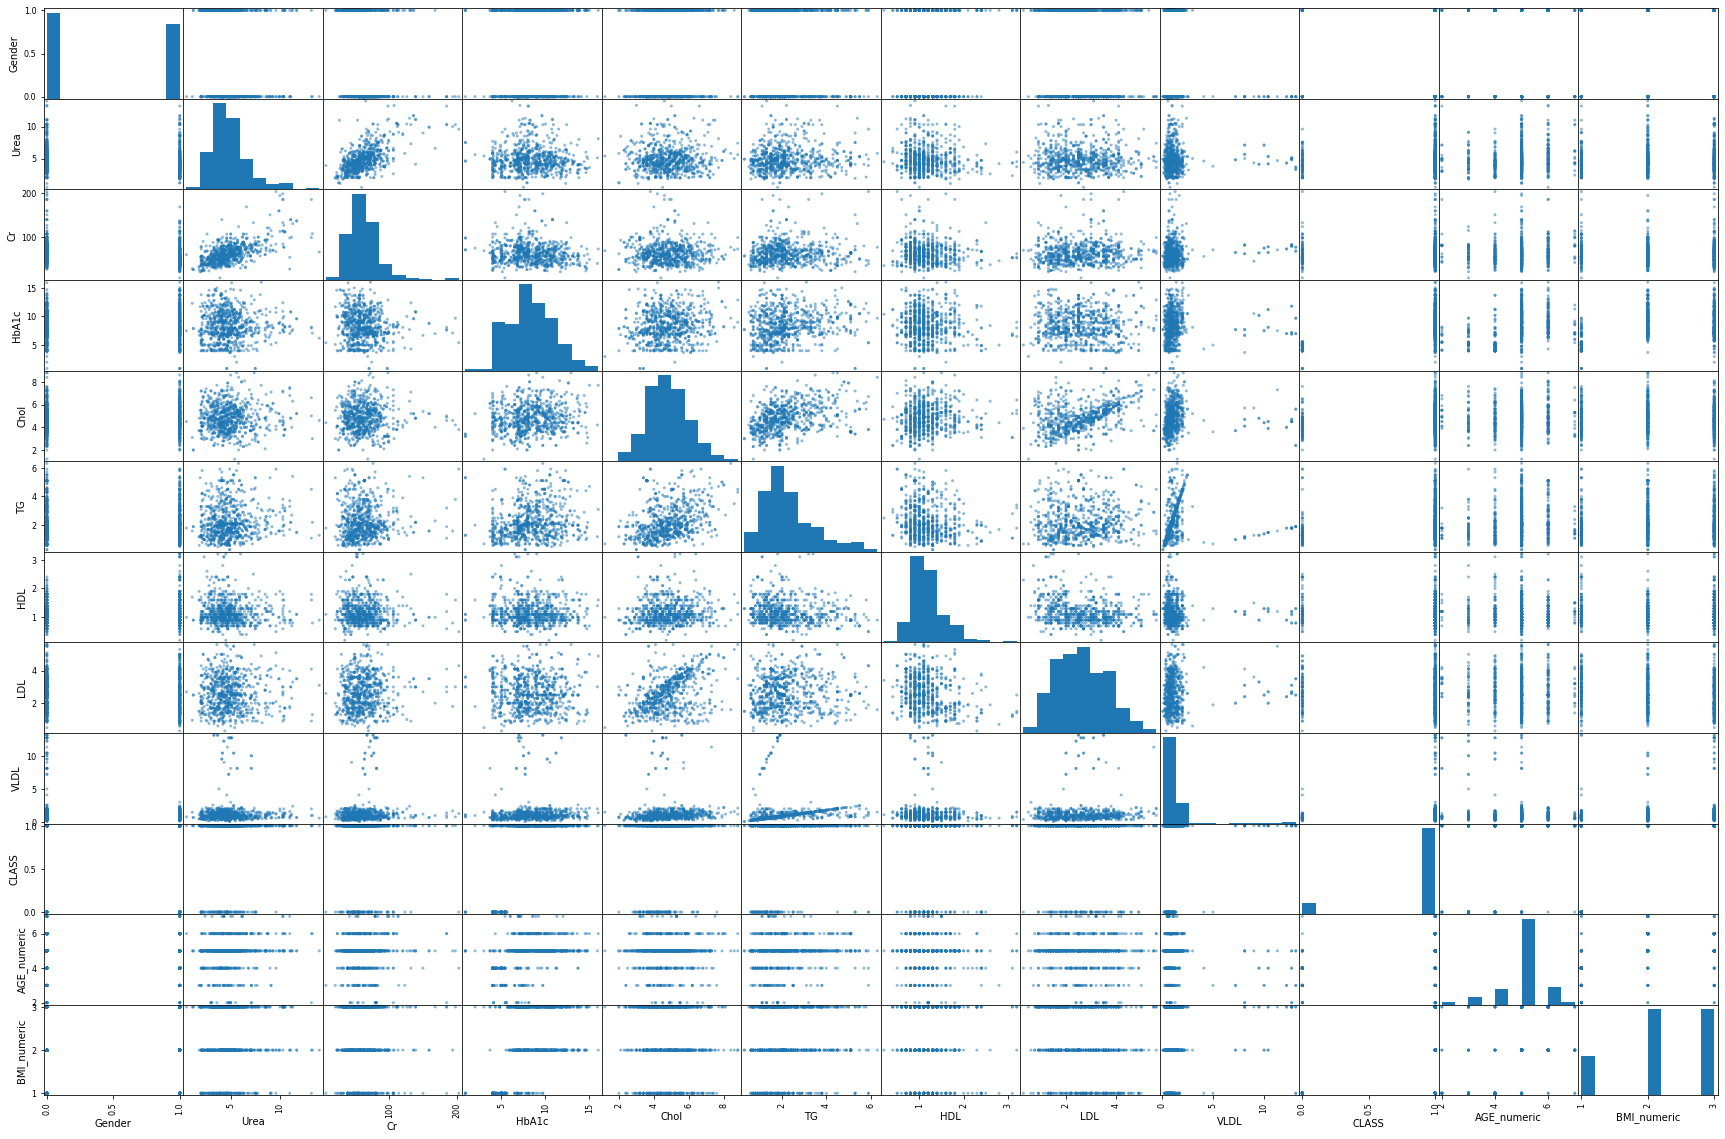

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select the independent variables and the dependent variable
X = df[['AGE_numeric','Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI_numeric']]
y = df['CLASS']

# Create a scatterplot matrix
scatter_matrix(df, figsize=(30, 20), diagonal='hist')
plt.show()

### 3. Building the model

#### 3.1 Train and Test Split


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into X (independent variables) and y (dependent variable)
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (678, 11)
X_test shape: (170, 11)
y_train shape: (678,)
y_test shape: (170,)


#### 3.2 Feature selection on training set

As mentioned in the previous section, based on the correlation matrix, the three variables HbA1c, BMI_numeric, and AGE_numeric have the strongest correlation with the dependent variable CLASS. Urea, Chol, and TG also have some correlation with CLASS, so including them in the model may improve its predictive power.

In [20]:
# Select the features
# selected_features = ['HbA1c', 'BMI_numeric', 'AGE_numeric', 'Urea', 'Chol', 'TG']

#### 3.3 Build a logistic regression model on the training set using the selected features


##### - Model 1: Features that have  correlation with dependent variable as shown in the correlation matrix

In [21]:
from sklearn.linear_model import LogisticRegression

# Select the features
selected_features = ['HbA1c', 'BMI_numeric', 'AGE_numeric', 'Urea', 'Chol', 'TG']

# Split the data into training and testing sets using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Instantiate the logistic regression model
model_1 = LogisticRegression()

# Fit the model on the training data
model_1.fit(X_train_selected, y_train)

# Predict the target variable for the test data using the trained model
y_pred = model_1.predict(X_test_selected)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9823529411764705
Precision: 0.9931972789115646
Recall: 0.9864864864864865
F1-score: 0.9898305084745763
Confusion Matrix:
 [[ 21   1]
 [  2 146]]


- Accuracy:  the accuracy is 0.982, which means that the model correctly classified 98.2% of the samples in the test set.

- Precision: the precision is 0.993, which means that when the model predicted a sample as positive, it was correct 99.3% of the time.

- Recall: the recall is 0.986, which means that the model correctly identified 98.6% of the actual positive samples in the test set.

- F1-score: the F1-score is 0.990, which is a high value indicating good performance.

- Confusion matrix: This shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) in the test set. In this case, there were 21 true negatives, 146 true positives, 1 false negative, and 2 false positives.

- Overall, the logistic regression model performed well in classifying the samples in the test set. The high accuracy, precision, recall, and F1-score values indicate that the model was able to identify the majority of the samples correctly, with a low number of false positives and false negatives.

##### - Model 2: Removing the features that have low correlation with the dependent variable CLASS

In [22]:
from sklearn.linear_model import LogisticRegression

# Select the features
selected_features = ['HbA1c', 'BMI_numeric', 'AGE_numeric']

# Split the data into training and testing sets using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Instantiate the logistic regression model
model_2 = LogisticRegression()

# Fit the model on the training data
model_2.fit(X_train_selected, y_train)

# Predict the target variable for the test data using the trained model
y_pred = model_2.predict(X_test_selected)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9647058823529412
Precision: 0.9930555555555556
Recall: 0.9662162162162162
F1-score: 0.9794520547945206
Confusion Matrix:
 [[ 21   1]
 [  5 143]]


Looking at the performance metrics of the two models on the test dataset, we can see that Model 1 has a higher accuracy, precision, recall, and F1-score than Model 2. This indicates that Model 1 is performing better than Model 2 in predicting the target variable on the test dataset. Additionally, the confusion matrices of both models show that Model 1 has fewer false positives and false negatives than Model 2, which further supports the conclusion that Model 1 is the better-performing model.

### 4. Testing the final model on the CLASS='P' cases

In [23]:
# Load the CSV file into a pandas dataframe
df_n = pd.read_csv('Diabetes Dataset.csv')

# Select only the rows where CLASS is equal to 'P'
df_p = df_n.query("CLASS == 'P'")
df_p.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
103,4,34301,F,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.0,P
104,496,56826,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,21.0,P
105,684,87658,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
106,366,11826,F,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,P
107,399,47513,F,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,P


#### 4.1 Preprocessing as the one I did for the df data

In [24]:
df_p = df_p.drop(['ID', 'No_Pation'], axis=1)
df_p['Gender'] = df_p['Gender'].replace({'M': 0, 'F': 1})
df_p['CLASS'] = df_p['CLASS'].replace({'P': 2})
df_p.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
103,1,43,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,25.0,2
104,1,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,21.0,2
105,1,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,2
106,1,49,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,23.0,2
107,1,39,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,22.0,2


In [25]:
age_map = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71+': 7}
bmi_map = {'0-18.5': 0, '18.5-25': 1, '25-30': 2, '>30': 3}

df_p['AGE_categories'] = pd.cut(df_p['AGE'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 100], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+'])
df_p['AGE_numeric_str'] = df_p['AGE_categories'].replace(age_map).astype(str)
df_p['AGE_numeric'] = df_p['AGE_numeric_str'].astype(int)
df_p = df_p.drop(columns=['AGE', 'AGE_categories', 'AGE_numeric_str'])

df_p['BMI_categories'] = pd.cut(df_p['BMI'], bins=[0, 18.5, 25, 30, df_p['BMI'].max()], labels=['0-18.5', '18.5-25', '25-30', '>30'])
df_p['BMI_numeric_str'] = df_p['BMI_categories'].replace(bmi_map).astype(str)
df_p['BMI_numeric'] = df_p['BMI_numeric_str'].astype(int)
df_p = df_p.drop(columns=['BMI', 'BMI_categories', 'BMI_numeric_str'])
df_p.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,CLASS,AGE_numeric,BMI_numeric
103,1,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,2,4,1
104,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,2,4,1
105,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,2,4,1
106,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,2,4,1
107,1,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,2,3,1


#### 4.2 Predicting diabetic class N/Y

In [26]:
#X_p = df_p.loc[:, ['HbA1c', 'BMI_numeric', 'AGE_numeric', 'Urea', 'Chol', 'TG']]


In [27]:
#y_pred_p = model_1.predict(X_p)

In [28]:
#df_p['CLASS_pred'] = y_pred_p

In [29]:
X_p = df_p.loc[:, ['HbA1c', 'BMI_numeric', 'AGE_numeric', 'Urea', 'Chol', 'TG']]
y_pred_p = model_1.predict(X_p)
df_p['CLASS_pred'] = y_pred_p
df_p.drop('CLASS', axis=1, inplace=True)

In [30]:
df_p.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,AGE_numeric,BMI_numeric,CLASS_pred
103,1,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,4,1,1
104,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,4,1,1
105,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,4,1,1
106,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,4,1,1
107,1,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,3,1,1


#### 4.3 Evaluating the model in the predicted dataset

Since the actual values of CLASS='P' are not available in the predicted dataset, I can't directly calculate metrics like accuracy, precision, recall, or F1-score. However, I can use the confusion matrix to evaluate the performance of your model on the predicted dataset. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives for each class. I can compare the predicted class labels with the true class labels from the original dataset to compute the confusion matrix.

In [31]:
from sklearn.metrics import confusion_matrix

# Select the features used for training the model
selected_features = ['HbA1c', 'BMI_numeric', 'AGE_numeric', 'Urea', 'Chol', 'TG']

# Extract the selected features and the target variable from the predicted dataset
X_pred = df_p[selected_features]
y_true = df_p['CLASS_pred']

# Predict the target variable using the trained model
y_pred = model_1.predict(X_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[17  0]
 [ 0 36]]


The confusion matrix suggests that there were a total of 53 samples evaluated, where 17 of them were predicted to belong to class 0 and were actually true negatives, while the other 36 were predicted to belong to class 1 and were actually true positives. There were no false negatives or false positives in this case, which means that the model's predictions were entirely accurate.

In summary:

- True positives (TP): 36 samples were correctly classified as class 1 (Y: Diabetic)
- True negatives (TN): 17 samples were correctly classified as class 0 (N: non diabbetic)
- False positives (FP): 0 samples were incorrectly classified as class 1 (Y: Diabetic)
- False negatives (FN): 0 samples were incorrectly classified as class 0 (N: non diabbetic)

### 5. What is the probability that these ‘prediabetic’ cases are diagnosed as diabetic?

In [32]:
df.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,CLASS,AGE_numeric,BMI_numeric
0,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0,4,1
1,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0,4,1
2,1,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0,4,1
3,1,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,0,4,1
4,1,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,0,4,1


In [33]:
df_p.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,AGE_numeric,BMI_numeric,CLASS_pred
103,1,2.1,55,5.7,4.7,5.3,0.90,1.70,2.4,4,1,1
104,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,4,1,1
105,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,4,1,1
106,1,3.3,44,6.0,5.6,1.9,0.75,1.35,0.8,4,1,1
107,1,3.0,38,6.4,4.7,1.3,1.10,3.10,0.6,3,1,1


In [34]:
# total count of N before prediction
total_N_before = df['CLASS'].value_counts()[0]

# total count of Y before prediction
total_Y_before = df['CLASS'].value_counts()[1]

# total count of P
total_P = num_rows_df_p = df_p.shape[0]

# total count of N after prediction
total_N_after = (df_p['CLASS_pred'] == 0).sum() + total_N_before


# total count of Y after prediction
total_Y_after = (df_p['CLASS_pred'] == 1).sum() + total_Y_before

In [35]:
total_N_before, total_Y_before, total_P, total_N_after, total_Y_after

(94, 754, 53, 111, 790)

PROBABILITY


- Probability of being diabetic (P(diabetic)) = total_Y_before / (total_Y_before + total_N_before)
- Probability of being prediabetic (P(prediabetic)) = total_N_before / (total_Y_before + total_N_before)
- Probability of being diagnosed as prediabetic given diabetic (P(prediabetic|diabetic)) = total_P / total_Y_before
- Probability of being diagnosed as diabetic given prediabetic (P(diabetic|prediabetic)) = (P(prediabetic|diabetic) * P(diabetic)) / P(prediabetic)
 
Using the above formulas and the provided values, we get:

P(diabetic) = 754 / (754 + 94) = 0.8892
P(prediabetic) = 111 / (111 + 790) = 0.1235
P(prediabetic|diabetic) = 53 / 754 = 0.0703
P(diabetic|prediabetic) = (0.0703 * 0.8892) / 0.1235 = 0.507
Therefore, the probability of a person being diagnosed as diabetic given they were initially predicted to be prediabetic is 0.507 or approximately 50.7%.

In [36]:
# calculate probability of being diabetic
P_diabetic = total_Y_before / (total_Y_before + total_N_before)

# calculate probability of being prediabetic
P_prediabetic = total_N_before / (total_Y_before + total_N_before)

# calculate probability of being diagnosed as prediabetic given diabetic
P_prediabetic_given_diabetic = total_P / total_Y_before

# calculate probability of being diagnosed as diabetic given prediabetic
P_diabetic_given_prediabetic = (P_prediabetic_given_diabetic * P_diabetic) / P_prediabetic


print("Probability of being diabetic: {}".format(P_diabetic))
print("Probability of being prediabetic: {}".format(P_prediabetic))
print("Probability of being diagnosed as prediabetic given diabetic: {}".format(P_prediabetic_given_diabetic))
print("Probability of being diagnosed as diabetic given prediabetic: {}".format(P_diabetic_given_prediabetic))


Probability of being diabetic: 0.8891509433962265
Probability of being prediabetic: 0.11084905660377359
Probability of being diagnosed as prediabetic given diabetic: 0.07029177718832891
Probability of being diagnosed as diabetic given prediabetic: 0.5638297872340425


...............................................................................................................................................................................................................................................

Code for Table of content

In [37]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>